In [51]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [52]:
df=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students.csv')[['Growth','Weight','Hair length','Children number','Sex']].dropna()
df_test=pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\students_test.csv')[['Growth','Weight','Hair length','Children number','Sex']].dropna()

In [214]:
df.head(20)

,Growth,Weight,Hair length,Children number,Sex
0,170,64.0,50.0,4.0,женский
2,172,60.0,4.0,2.0,мужской
3,168,59.0,20.0,2.0,женский
4,159,57.0,55.0,2.5,женский
7,180,120.0,20.0,2.0,мужской
8,185,69.0,25.0,0.0,мужской
9,168,58.0,45.0,5.0,женский
10,158,47.0,50.0,3.0,женский
11,183,98.0,1.0,6.0,мужской
16,185,64.0,4.0,0.0,мужской


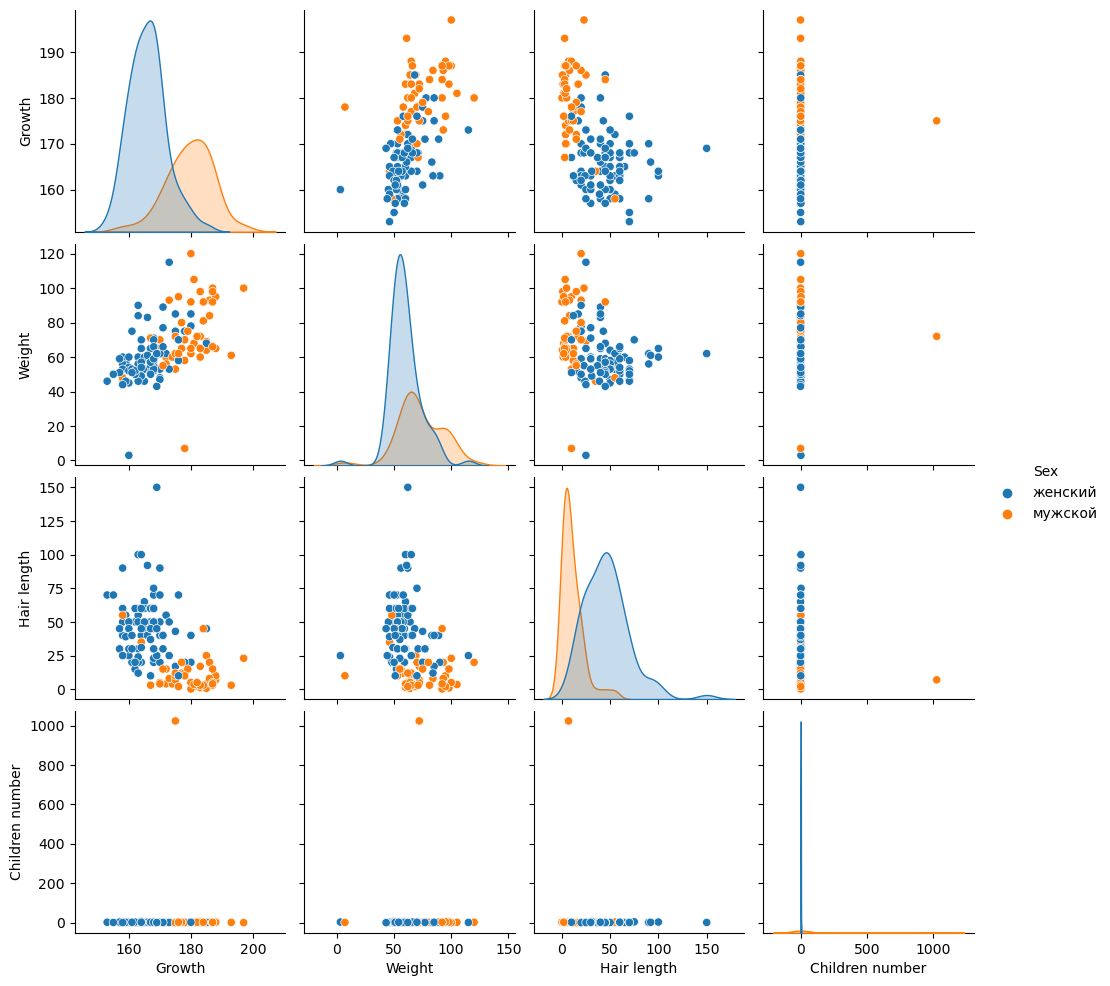

In [53]:
sns.pairplot(df,hue='Sex')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 185
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Growth           131 non-null    int64  
 1   Weight           131 non-null    float64
 2   Hair length      131 non-null    float64
 3   Children number  131 non-null    float64
 4   Sex              131 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 6.1+ KB


In [226]:
model = tree.DecisionTreeClassifier(max_depth=2)
arr=df[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4)
arr_test=df_test[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4)
model.fit(arr,df['Sex'].values)
df_test['Predict']=model.predict(arr_test)

pd.crosstab(df_test['Predict'],df_test['Sex'])

Sex,женский,мужской
Predict,,
женский,40,1
мужской,2,25


recall = доля истенных Х среди всех Х
precition = доля истенных Х среди тех, кого отнесли к Х (доля женщин среди тех, кого посчитали женщиной)

In [225]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_test['Sex'],df_test['Predict'])

(array([0.97560976, 0.92592593]),
 array([0.95238095, 0.96153846]),
 array([0.96385542, 0.94339623]),
 array([42, 26], dtype=int64))

In [1]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=['Growth','Weight','Hair length','Children number'],
                                class_names=['f','m'], 
                                filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

NameError: name 'tree' is not defined

In [217]:
model.predict([[183,76,20,0]])

array(['мужской'], dtype=object)

[Text(0.5, 0.8333333333333334, 'x[2] <= 18.5\ngini = 0.46\nsamples = 131\nvalue = [84, 47]'),
 Text(0.25, 0.5, 'x[0] <= 168.5\ngini = 0.206\nsamples = 43\nvalue = [5, 38]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.097\nsamples = 39\nvalue = [2, 37]'),
 Text(0.75, 0.5, 'x[0] <= 176.5\ngini = 0.184\nsamples = 88\nvalue = [79, 9]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.051\nsamples = 77\nvalue = [75, 2]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]')]

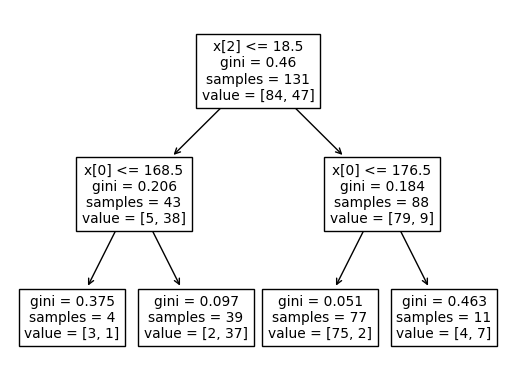

In [218]:
tree.plot_tree(model)

<AxesSubplot: xlabel='Weight', ylabel='Growth'>

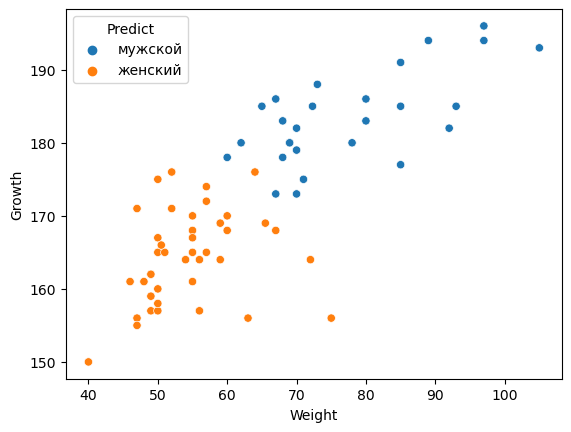

In [219]:
sns.scatterplot(data=df_test,x='Weight',y='Growth',hue='Predict')

<AxesSubplot: xlabel='Weight', ylabel='Growth'>

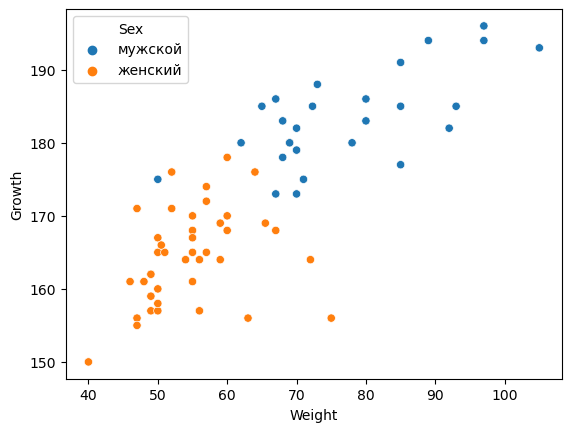

In [220]:
sns.scatterplot(data=df_test,x='Weight',y='Growth',hue='Sex')

In [222]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

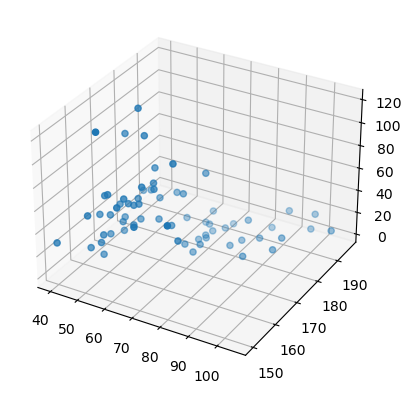

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_test['Weight'],df_test['Growth'],df_test['Hair length'], s=[20])